In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats.mstats import winsorize

## Carga de datos

Se cargan las columnas con formatos adecuados según el tipo de datos.  
Se usa como índice building_id para train_values y train_labels  

In [3]:
# Train values
# Levantar los datos de cada edificio/casa
df = pd.read_csv('datos/train_values.csv',nrows=0)
columnas = df.columns.to_list()
datatypes = {
    **{columnas[0]:np.int32}\
    , **{column:np.int16 for column in columnas[1:8] + columnas[27:28]}\
    , **{column:'category' for column in columnas[8:15] + columnas[26:27]}\
    , **{column:np.bool for column in columnas[15:26] + columnas[28:39]}
}
train_values = pd.read_csv('datos/train_values.csv',dtype=datatypes)
train_values = train_values.set_index("building_id")
columnas = train_values.columns.to_list()

In [4]:
#Train labels
train_labels = pd.read_csv('datos/train_labels.csv',index_col='building_id')

In [5]:
test_values = pd.read_csv('datos/test_values.csv', index_col='building_id')

## Mean encoding geo_level_id_1

In [6]:
df = train_values.copy()
df = df[['geo_level_1_id']]
df = df.join(train_labels,on='building_id',how='inner')
df['count_high_damage'] = df['damage_grade'] == 3
df

,geo_level_1_id,damage_grade,count_high_damage
building_id,,,
802906,6,3,True
28830,8,2,False
94947,21,3,True
590882,22,2,False
201944,11,3,True
...,...,...,...
688636,25,2,False
669485,17,3,True
602512,17,3,True


In [7]:
mean_damage = df.groupby('geo_level_1_id').agg('mean')[['count_high_damage']]
mean_damage

,count_high_damage
geo_level_1_id,
0,0.15
1,0.11
2,0.25
3,0.36
4,0.20
5,0.09
6,0.25
7,0.35
8,0.52


In [8]:
df2 = test_values.copy()

In [9]:
df2

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,t,r,q,...,1,0,0,0,0,0,0,0,0,0
663567,10,1407,11907,3,25,6,7,n,r,n,...,0,0,0,0,0,0,0,0,0,0
1049160,22,1136,7712,1,50,3,3,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df2.join(mean_damage,on='geo_level_1_id',how='inner').sample(20)[['geo_level_1_id','count_high_damage']]

,geo_level_1_id,count_high_damage
building_id,,
27369,4,0.20
897669,20,0.12
178409,4,0.20
509005,21,0.58
830693,17,0.81
682779,6,0.25
137776,26,0.09
217577,11,0.38
163491,21,0.58


In [11]:
df.groupby('geo_level_1_id').transform('mean')

,damage_grade,count_high_damage
building_id,,
802906,2.16,0.25
28830,2.49,0.52
94947,2.56,0.58
590882,2.00,0.13
201944,2.34,0.38
...,...,...
688636,2.05,0.14
669485,2.79,0.81
602512,2.79,0.81


In [12]:
df['mean_high_damage'] = df.groupby('geo_level_1_id').transform('mean')['count_high_damage']

In [13]:
df

,geo_level_1_id,damage_grade,count_high_damage,mean_high_damage
building_id,,,,
802906,6,3,True,0.25
28830,8,2,False,0.52
94947,21,3,True,0.58
590882,22,2,False,0.13
201944,11,3,True,0.38
...,...,...,...,...
688636,25,2,False,0.14
669485,17,3,True,0.81
602512,17,3,True,0.81


## Analisis estructural

### has_super_structure

In [98]:
superstructures = train_values[columnas[14:25]]
superstructures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 11 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   has_superstructure_adobe_mud            260601 non-null  bool 
 1   has_superstructure_mud_mortar_stone     260601 non-null  bool 
 2   has_superstructure_stone_flag           260601 non-null  bool 
 3   has_superstructure_cement_mortar_stone  260601 non-null  bool 
 4   has_superstructure_mud_mortar_brick     260601 non-null  bool 
 5   has_superstructure_cement_mortar_brick  260601 non-null  bool 
 6   has_superstructure_timber               260601 non-null  bool 
 7   has_superstructure_bamboo               260601 non-null  bool 
 8   has_superstructure_rc_non_engineered    260601 non-null  bool 
 9   has_superstructure_rc_engineered        260601 non-null  bool 
 10  has_superstructure_other                260601 non-null  bool 


In [99]:
labels = superstructures.columns.to_list()
labels = [superstructure.split("superstructure_")[-1] for superstructure in labels]
new_columns = dict(zip(superstructures.columns.to_list(),labels))
new_columns

{'has_superstructure_adobe_mud': 'adobe_mud',
 'has_superstructure_mud_mortar_stone': 'mud_mortar_stone',
 'has_superstructure_stone_flag': 'stone_flag',
 'has_superstructure_cement_mortar_stone': 'cement_mortar_stone',
 'has_superstructure_mud_mortar_brick': 'mud_mortar_brick',
 'has_superstructure_cement_mortar_brick': 'cement_mortar_brick',
 'has_superstructure_timber': 'timber',
 'has_superstructure_bamboo': 'bamboo',
 'has_superstructure_rc_non_engineered': 'rc_non_engineered',
 'has_superstructure_rc_engineered': 'rc_engineered',
 'has_superstructure_other': 'other'}

In [100]:
superstructures = superstructures.rename(columns=new_columns)

In [101]:
edificios_superstructures = superstructures.idxmax(1).to_frame().rename(columns={0:'superstructure'}).reset_index()
edificios_superstructures

,building_id,superstructure
0,802906,adobe_mud
1,28830,mud_mortar_stone
2,94947,mud_mortar_stone
3,590882,mud_mortar_stone
4,201944,adobe_mud
...,...,...
260596,688636,mud_mortar_stone
260597,669485,mud_mortar_stone
260598,602512,mud_mortar_stone
260599,151409,cement_mortar_brick


In [156]:
category_df = train_values[columnas[14:25]].idxmax(1).to_frame().rename(columns={0:'superstructure'})
category_df

,superstructure
building_id,
802906,has_superstructure_adobe_mud
28830,has_superstructure_mud_mortar_stone
94947,has_superstructure_mud_mortar_stone
590882,has_superstructure_mud_mortar_stone
201944,has_superstructure_adobe_mud
...,...
688636,has_superstructure_mud_mortar_stone
669485,has_superstructure_mud_mortar_stone
602512,has_superstructure_mud_mortar_stone


In [90]:
# codigo sacado de 5_daños_localizacion del TP1
edificios_superstructures_daños = pd.merge(edificios_superstructures,train_labels,on='building_id',how='inner').groupby(['superstructure','damage_grade']).count().unstack()
edificios_superstructures_daños

building_id               
damage_grade                  1       2      3
superstructure                                
adobe_mud                   594   13902   8605
bamboo                      441     513     98
cement_mortar_brick        6537    8562    601
cement_mortar_stone         651    1506    321
mud_mortar_brick            442    5852   2183
mud_mortar_stone           8571  109073  72996
other                       180     111     51
rc_engineered              1775     774     49
rc_non_engineered          2358    1766    104
stone_flag                   52    1276   1373
timber                     3523    4924    837

In [95]:
#quiero que para cada edificio del tipo superstructure X tenga 3 columnas
# con su probabilidad de que haya sido afectada en grado tipo Y (low,medium,high)
edificios_superstructures_daños_perc = edificios_superstructures_daños.div(edificios_superstructures_daños\
                                                                    .sum(axis=1), axis=0)
                                                                    
edificios_superstructures_daños_perc

building_id                       \
damage_grade                           1                    2   
superstructure                                                  
adobe_mud                           0.03                 0.60   
bamboo                              0.42                 0.49   
cement_mortar_brick                 0.42                 0.55   
cement_mortar_stone                 0.26                 0.61   
mud_mortar_brick                    0.05                 0.69   
mud_mortar_stone                    0.04                 0.57   
other                               0.53                 0.32   
rc_engineered                       0.68                 0.30   
rc_non_engineered                   0.56                 0.42   
stone_flag                          0.02                 0.47   
timber                              0.38                 0.53   

                                          
damage_grade                           3  
superstructure                            
adobe_mud                           0.37  
bamboo                              0.09  
cement_mortar_brick                 0.04  
cement_mortar_stone                 0.13  
mud_mortar_brick                    0.26  
mud_mortar_stone                    0.38  
other                               0.15  
rc_engineered                       0.02  
rc_non_engineered                   0.02  
stone_flag                          0.51  
timber                              0.09

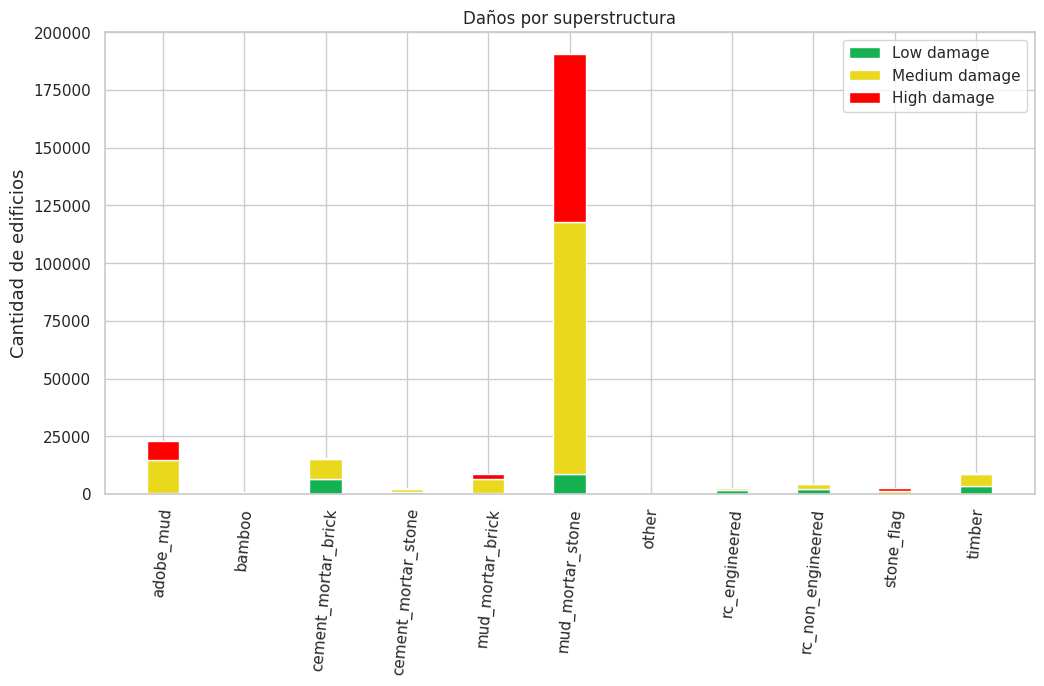

In [89]:
labels = edificios_superstructures_daños.index.to_list()
low_affected = np.array(edificios_superstructures_daños[('building_id',1)].to_list())
medium_affected = np.array(edificios_superstructures_daños[('building_id',2)].to_list())
high_affected = np.array(edificios_superstructures_daños[('building_id',3)].to_list())

width = 0.4
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, low_affected, width, label='Low damage',color='#13b151')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Medium damage', color='#ead81c')
ax.bar(labels, high_affected, width, bottom=low_affected+medium_affected,label='High damage', color='red')

ax.set_title('Daños por superstructura')
ax.legend()
plt.xticks(labels,rotation=85)
ax.set_ylabel('Cantidad de edificios', fontsize = 13)
plt.show()

## Creacion de las nuevas columnas mean_superstructure

In [103]:
# Ya tengo algo parecido con geo_level_id, puedo lograr algo similar si cambio geo_level_id <-> superstructure
# Para eso debo juntar en una sola columna a superstructure, luego lo paso por la funcion de antes.
edificios_superstructures_test = edificios_superstructures.copy()
edificios_superstructures_test = edificios_superstructures_test.set_index('building_id')
edificios_superstructures_test

,superstructure
building_id,
802906,adobe_mud
28830,mud_mortar_stone
94947,mud_mortar_stone
590882,mud_mortar_stone
201944,adobe_mud
...,...
688636,mud_mortar_stone
669485,mud_mortar_stone
602512,mud_mortar_stone


In [104]:
def agregar_col_mean_daño_por_superstructure(input_df,labels_df,col_name_geo,damage_grade):
    """Agrega una columna llamada mean_damage_superstructure con el mean damage para el daño 'damage_grade'"""
    damage_names = {1:'low',2:'medium',3:'high'}
    work_df = input_df[[col_name_geo]].copy()
    work_df = work_df.join(labels_df,on='building_id',how='inner')
    work_df['count_high_damage'] = work_df['damage_grade'] == damage_grade
    input_df['mean_'+damage_names[damage_grade]+'_damage_'+col_name_geo] = work_df.groupby(col_name_geo).transform('mean')['count_high_damage']
    return input_df

In [105]:
colname = 'superstructure'
damage_grade = 3
edificios_superstructures_test_resultado = agregar_col_mean_daño_por_columna(train_values_transformado,train_labels,colname,damage_grade)
edificios_superstructures_test_resultado

,superstructure,mean_high_damage_superstructure
building_id,,
802906,adobe_mud,0.37
28830,mud_mortar_stone,0.38
94947,mud_mortar_stone,0.38
590882,mud_mortar_stone,0.38
201944,adobe_mud,0.37
...,...,...
688636,mud_mortar_stone,0.38
669485,mud_mortar_stone,0.38
602512,mud_mortar_stone,0.38


## Hago la transformacion de test a mano

In [58]:
test_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,t,r,q,...,1,0,0,0,0,0,0,0,0,0
663567,10,1407,11907,3,25,6,7,n,r,n,...,0,0,0,0,0,0,0,0,0,0
1049160,22,1136,7712,1,50,3,3,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [116]:
test_category = test_values[columnas[14:25]].idxmax(1).to_frame().rename(columns={0:'superstructure'})

In [117]:
test_category

,superstructure
building_id,
300051,has_superstructure_mud_mortar_stone
99355,has_superstructure_mud_mortar_stone
890251,has_superstructure_mud_mortar_stone
745817,has_superstructure_cement_mortar_brick
421793,has_superstructure_mud_mortar_stone
...,...
310028,has_superstructure_mud_mortar_stone
663567,has_superstructure_adobe_mud
1049160,has_superstructure_mud_mortar_stone


In [119]:
resultado1 = agregar_col_mean_daño_de_dataframe(test_category,train_labels,'superstructure',3,category_df)
resultado1

,superstructure,mean_high_damage_superstructure
building_id,,


In [112]:
resultado1[['mean_high_damage_superstructure']]

,mean_high_damage_superstructure
building_id,
802906,0.37
28830,0.38
94947,0.38
590882,0.38
201944,0.37
...,...
688636,0.38
669485,0.38
602512,0.38


In [115]:
agregar_columna_mean_damage(test,'superstructure',train_values,train_labels,damage_grade):

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86868 entries, 300051 to 501372
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   geo_level_1_id                          86868 non-null  int64  
 1   geo_level_2_id                          86868 non-null  int64  
 2   geo_level_3_id                          86868 non-null  int64  
 3   count_floors_pre_eq                     86868 non-null  int64  
 4   age                                     86868 non-null  int64  
 5   area_percentage                         86868 non-null  int64  
 6   height_percentage                       86868 non-null  int64  
 7   land_surface_condition                  86868 non-null  object 
 8   foundation_type                         86868 non-null  object 
 9   roof_type                               86868 non-null  object 
 10  ground_floor_type                       86868 non-nu

## Codigo mean superstructure transformation

Training

In [ ]:
# Adapto para el caso donde recibe un df con unica columna categorica (OHE a categorico)
def agregar_col_mean_daño_de_dataframe(input_df,labels_df,col_name,damage_grade,category_df):
    """Aplica agregar_col_mean_daño_por_columna() a input_df a partir de un dataframe: category_df 
    que tiene como indice el mismo que input_df y una unica columna de tipo categórico"""
    #Aplica la funcion al category_df->Devuelve df con una nueva columna con mean_X_damage_'col_name'
    category_df_work = category_df.copy()
    resultado_transformacion = agregar_col_mean_daño_por_columna(category_df_work,train_labels,col_name,damage_grade)
    #Solo me interesa la columna nueva que se creó. Se la pego a el dataframe input
    new_col_name = nombre_nueva_mean_col(col_name,damage_grade)
    # hay que rellenar los nulls?
    output_df = input_df.join(resultado_transformacion[[new_col_name]],on='building_id',how='inner')
    return output_df

In [13]:
steps_superstructures = []
category_df = train_values[columnas[14:25]].idxmax(1).to_frame().rename(columns={0:'superstructure'})
for damage_grade in range(1,4):
    nombre_step = 'add_damage_'+str(damage_grade)+'_superstructure'
    args = {'labels_df': train_labels,'col_name': 'superstructure','damage_grade':damage_grade,'category_df':category_df}
    steps_superstructures.append((nombre_step,FunctionTransformer(agregar_col_mean_daño_de_dataframe,kw_args=args)))

In [14]:
pipeline_superstructures = Pipeline(steps=steps_superstructures)

In [17]:
train_values_transformado = pipeline_superstructures.fit_transform(train_values_transformado)

Test

In [ ]:

def agregar_columna_mean_damage_categorico(input_df,column_name,train_values,train_labels,damage_grade):
    """
    El input_df es el test_values, se calcula la media para ese mean damage y se le pega al test_values
    """
    ##Diferencia con agregar_columna normal
    df = train_values.copy()
    df = df[columnas[14:25]].idxmax(1).to_frame().rename(columns={0:'superstructure'})
    ##A partir de aca es igual..
    df = df.join(train_labels,on='building_id',how='inner')
    df['count_high_damage'] = df['damage_grade'] == damage_grade
    ## Df tiene una columna donde es 1 si el daño es de grado 'damage_grade'.
    mean_damage = df.groupby(column_name).agg('mean')[['count_high_damage']]
    ## mean damage es un df con indice 'column_name' y como unica columna 'count_high_damage'
    
    df2 = input_df.copy()
    df2 = df2[columnas[14:25]].idxmax(1).to_frame().rename(columns={0:'superstructure'})    
    
    df2 = df2.join(mean_damage,on=column_name,how='left')
    nombre_nueva_col = nombre_nueva_mean_col(column_name,damage_grade)
    df2 = df2.rename(columns={'count_high_damage': nombre_nueva_col})
    df2 = df2[[nombre_nueva_col]]
    ## manejo de nulls -> agrego la media global de ese mean_'damage_grade'_geo_level_'i'_id si es null 
    mean_global = df2[nombre_nueva_col].mean()
    df2[nombre_nueva_col] = df2[nombre_nueva_col].fillna(value=mean_global)
    output_df = input_df.copy()
    output_df[nombre_nueva_col] = df2[nombre_nueva_col]
    return output_df

In [29]:
steps_superstructure_test = []
for damage_grade in range(1,4):
    nombre_step = 'add_damage_'+str(damage_grade)+'superstructure'
    args = {'train_values':train_values,'train_labels': train_labels,'column_name': 'superstructure','damage_grade':damage_grade}
    steps_superstructure_test.append((nombre_step,FunctionTransformer(agregar_columna_mean_damage_categorico,kw_args=args)))

In [ ]:
pipeline_daños_superstructure_test = Pipeline(steps=steps_superstructure_test)

In [34]:
test_values_subset = pipeline_daños_superstructure_test.fit_transform(test_values_subset)